In [92]:
import pandas as pd
import numpy as np

#base = pd.concat[pd.read_csv(i,sep=';', encoding='latin-1') for i in files]
base_bolsa_2014 = pd.read_csv('bolsistas_extencao_2014.csv',sep=';', encoding='latin-1')
base_bolsa_2015 = pd.read_csv('bolsistas_extencao_2015.csv',sep=';', encoding='latin-1')
base_bolsa_2016 = pd.read_csv('bolsistas_extencao_2016.csv',sep=';', encoding='latin-1')
base_bolsa_2017 = pd.read_csv('bolsistas_extencao_2017.csv',sep=';', encoding='latin-1')
base_bolsa_2018 = pd.read_csv('bolsistas_extencao_2018.csv',sep=';', encoding='latin-1')
base_bolsa_2019 = pd.read_csv('bolsistas_extencao_2019.csv',sep=';', encoding='latin-1')

In [93]:
base_bolsa_2014.columns = base_bolsa_2014.columns.str.strip()
base_bolsa_2015.columns = base_bolsa_2015.columns.str.strip()
base_bolsa_2016.columns = base_bolsa_2016.columns.str.strip()
base_bolsa_2017.columns = base_bolsa_2017.columns.str.strip()
base_bolsa_2018.columns = base_bolsa_2018.columns.str.strip()
base_bolsa_2019.columns = base_bolsa_2019.columns.str.strip()

In [94]:
base = pd.concat([base_bolsa_2014,base_bolsa_2015,base_bolsa_2016,base_bolsa_2017,base_bolsa_2018,base_bolsa_2019], sort=False)
base['CONTADOR'] = 1
base.columns = base.columns.str.upper()
base = base.rename(columns={'INÍCIO BOLSA': 'INICIO BOLSA'})
base = base.rename(columns={'TÉRMINO BOLSA': 'TERMINO BOLSA'})

In [95]:
base[['CURSO','resto']] = base.CURSO.str.split("     ",n=1,expand=True,)
base = base.drop(columns=['resto'])

In [96]:
base['INICIO BOLSA'] = pd.to_datetime(base['INICIO BOLSA'], format='%d/%m/%Y')
base['TERMINO BOLSA'] = pd.to_datetime(base['TERMINO BOLSA'], format='%d/%m/%Y')
base['Dias_com_bolsa'] = base['TERMINO BOLSA'].sub(base['INICIO BOLSA'], axis=0)

In [97]:
cursos_de_interesse = ['ENGENHARIA DE PRODUCAO ','ENGENHARIA METALURGICA','ENGENHARIA DE CONTROLE E AUTOMACAO','ENGENHARIA CIVIL','ENGENHARIA MECANICA','ARQUITETURA E URBANISMO','ENGENHARIA URBANA','ENGENHARIA DE MINAS','ENGENHARIA GEOLOGICA','ENGENHARIA AMBIENTAL']

#selecionando com isin
base = base[base['CURSO'].isin(cursos_de_interesse) == True]

In [98]:
base['Dias_com_bolsa'] = base['Dias_com_bolsa'].astype(str)
base[['Dias','string']] = base.Dias_com_bolsa.str.split(" ",n=1,expand=True,)
base['Dias'] = base['Dias'].astype(int)
base = base.drop(columns=['string'])

base.tail()

,NOME,CURSO,BOLSA,INICIO BOLSA,TERMINO BOLSA,PROJETO,CONTADOR,Dias_com_bolsa,Dias
233,MARINA MIRANDA DE FARIA,ARQUITETURA E URBANISMO,EXTENSÃO DEARQ 2019,2019-04-01,2019-12-15,O REASSENTAMENTO INVOLUNTARIO DOS ATINGIDOS DE...,1,258 days 00:00:00.000000000,258
241,NICOLAS DE OLIVEIRA FERNANDES,ARQUITETURA E URBANISMO,EXTENSÃO DEARQ 2019,2019-03-01,2019-12-31,ACOMPANHAMENTO DA COMPRA INSTITUCIONAL DA AGRI...,1,305 days 00:00:00.000000000,305
282,ANA LUISA SANTOS MARTINS,ENGENHARIA CIVIL,EXTENSÃO DEPRO 2019,2019-03-01,2019-12-31,USO EFICIENTE DE AGUA E ENERGIA NA ESCOLA DE M...,1,305 days 00:00:00.000000000,305
292,DANIEL SILVA NEIVA,ENGENHARIA AMBIENTAL,EXTENSÃO DEMUL 2019,2019-03-01,2019-12-20,ASTRONOMIA NA COMUNIDADE E ITINERANTE,1,294 days 00:00:00.000000000,294
305,ANA LUIZA SILVA SANTOS FELIX,ENGENHARIA URBANA,EXTENSÃO DEURB 2019,2019-03-01,2019-12-31,Educação Sanitária Sustentável em Áreas de Int...,1,305 days 00:00:00.000000000,305


In [99]:
base.groupby(['CURSO']).Dias.sum()

CURSO
ARQUITETURA E URBANISMO               19187
ENGENHARIA AMBIENTAL                   5501
ENGENHARIA CIVIL                       4539
ENGENHARIA DE CONTROLE E AUTOMACAO     3432
ENGENHARIA DE MINAS                    6102
ENGENHARIA GEOLOGICA                   4418
ENGENHARIA MECANICA                    3828
ENGENHARIA METALURGICA                  274
ENGENHARIA URBANA                       609
Name: Dias, dtype: int32

In [100]:
dias_com_bolsa = pd.DataFrame({'Dias com bolsa': base.groupby(['CURSO']).Dias.sum()}).reset_index()
bolsas_por_curso = pd.DataFrame({'Quantidade de Bolsas': base.groupby(['CURSO']).CONTADOR.sum()}).reset_index()
tabela = bolsas_por_curso.join(dias_com_bolsa.set_index('CURSO'), on = 'CURSO')

EM_total = pd.read_csv('emtotalordenado.csv',sep=';', encoding='latin-1')
matriculados = EM_total.groupby(EM_total['Curso']).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados).reset_index()

cursos_matriculados = matriculados["Curso"].str.split("-", n = 1, expand = True)
matriculados['CURSO'] = cursos_matriculados[0]
matriculados.drop(columns =["Curso"], inplace = True) 
tabela = tabela.join(matriculados.set_index('CURSO'), on = 'CURSO')
tabela = tabela.rename(columns={'TotalGeral': 'Matriculados'})

In [102]:
tabela['Bolsas por 100 alunos'] =round(((tabela['Quantidade de Bolsas']/tabela['Matriculados'])*100),2)
tabela['Medias_dias_das_bolsas'] = round((tabela['Dias com bolsa']/tabela['Quantidade de Bolsas']),0)

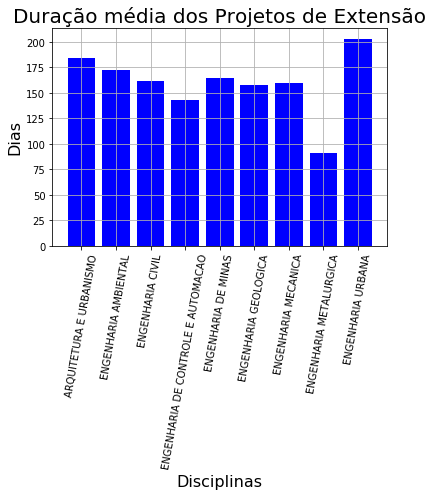

In [112]:
import matplotlib.pyplot as plt

plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,5].values,color = 'blue',linewidth=5)

#plt.ylim([-10,10])
plt.ylabel('Dias',size = 16)
plt.xlabel('Disciplinas',size = 16)

plt.xticks(rotation = 80)
plt.yticks()

#plt.xlim([2004.0,2018.0])

plt.title('Duração média dos Projetos de Extensão', size = 20)
#plt.legend(loc = ('best'),fontsize=18)
plt.grid(True)
plt.show()